In [1]:
import cv2
from imutils.perspective import four_point_transform
from PIL import Image
from google.colab.patches import cv2_imshow

In [2]:
# Отображение картинки
def cv2_show(name, img):
#  cv2.imshow(name, img) # Для компа
  cv2_imshow(img) # Для колаба
  cv2.waitKey(0)
  cv2.destroyAllWindows()

In [3]:
# Готовим картинку и определяем контуры
ratio = 0.1 # Задаем множитель масштабирования изображения, используемого для определения рамки ()
image = cv2.imread('photo_2023-11-10_15-42-33.jpg')
cv2_show('origin',image)
orig = image.copy()  # сохраняем оригинальное изображение в переменную
# сжимаем картинку
resize_image = cv2.resize(orig, None,fx=ratio,fy=ratio)
cv2_show('resize', resize_image)
# преобразуем в серый
gray = cv2.cvtColor(resize_image, cv2.COLOR_BGR2GRAY)
cv2_show('gray',gray)
# Размываем для сглаживания и удаления шума
blur = cv2.GaussianBlur(gray, (3, 3), 0)
cv2_show('GaussianBlur',blur)
# Находим контуры по градиенту
edged = cv2.Canny(blur,0, 255)
cv2_show('edge', edged)

Output hidden; open in https://colab.research.google.com to view.

cnts 287
[[[ 16  11]]

 [[  9 237]]

 [[175 230]]

 [[164  15]]]


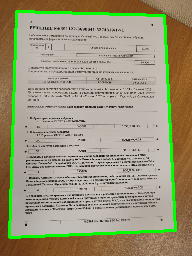

In [4]:
# Находим контур страницы
image=resize_image.copy()
cnts, hierancy = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
# cnts = sorted (cnts, key = cv2.contourArea, reverse = True) [: 5] # Сортировка контуров по размеру области и выбор самого большого контура среди 5 лучших, если есть несколько маленьких билетов
print('cnts',len(cnts))
#cv2.drawContours(image, cnts, -1, (0, 0, 255), 2)
#cv2_show('contour', image)
for c in cnts[::-1]: # перебор в обратном порядке (с больших контуров)
  perimetr = cv2.arcLength(c, True)  # определяем длину закрытого контура
  # print(peri)
  approx=cv2.approxPolyDP(c, 0.01* perimetr, True)  # Аппроксимируем контур чтобы получить закрытый четырехугольник
  if len(approx)==4:  # Если обнаружен четырехугольник
    screenCnt = approx
#    print(screenCnt)
    break
print(screenCnt)
cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)  # Рисуем найденный контур, -1 означает рисовать все
cv2_show('contour', image)

In [5]:
# Преобразование перспективы
wraped = four_point_transform(orig, screenCnt.reshape(4, 2)/ratio)
# Показываем и сохраняем результат
cv2_show('wrap',wraped)
wraped = cv2.cvtColor(wraped, cv2.COLOR_BGR2GRAY)
cv2_show('wrap2',wraped)
ref = cv2.threshold(wraped, 120, 255, cv2.THRESH_BINARY)[1]
cv2_show('ref',ref)
cv2.imwrite('result.jpg', ref)

Output hidden; open in https://colab.research.google.com to view.